In [67]:
import pandas
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import matplotlib.pyplot as pyplot
import pickle
import warnings

with open ('schools', 'rb') as fp:
    schools = pickle.load(fp)
with open ('schoolsdict', 'rb') as fp:
    schoolsdict = pickle.load(fp)
    with open('schoolsdict2','rb') as fp:
    schoolsdict2 = pickle.load(fp)
with open('schoolsdict3','rb') as fp:
    schoolsdict3 = pickle.load(fp)
with open('schoolsdict4','rb') as fp:
    schoolsdict4 = pickle.load(fp)
with open ('menu', 'rb') as fp:
    menu = pickle.load(fp)

##### Building and Training LSTM 

In [68]:
columns=[]
heading=["2016-Q4"]
for i in range(2017,2019):
    for j in ["Q1","Q2","Q3","Q4"]:
        heading.append(str(i)+"-"+j)
for i in range(1,23):
    if len(str(i))==1:
        ii='0'+str(i)
    else:
        ii=str(i)
    columns.append(ii)
    
    # split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [9]:
oldfuture={}
predgraph={}
for i in schools:
    dataset= schoolsdict3[i].drop(['2019-Q1','2019-Q2','2019-Q3','2019-Q4']).values
    n_steps_in, n_steps_out = 18, 9
    # covert into input/output
    X, y = split_sequences(dataset, n_steps_in, n_steps_out)
    print(len(X))
    Xtrain,ytrain=X[:-5],y[:-5]
    Xtest,ytest=X[-5:],y[-5:]
    Xtest=Xtest.reshape(5,n_steps_in,22)
    ytest=ytest.reshape(5,n_steps_out,22)
    X,y=Xtrain,ytrain

    n_features = X.shape[2]
    # define model
    model = Sequential()
    model.add(LSTM(200, dropout=0.2,activation='relu', input_shape=(n_steps_in, n_features)))
    model.add(RepeatVector(n_steps_out))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(n_features)))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    history=model.fit(X, y, epochs=75, validation_data=(Xtest, ytest),verbose=0)
    predgraph[i]=history.history

    x_input = Xtest[-1]
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    yhat=yhat.round()
    yhat=pandas.DataFrame(yhat.reshape(9,22))
    yhat.columns=columns
    yhat=yhat.T
    yhat.columns=heading
    yhat=yhat.T
    oldfuture[i]=yhat
    print("I'm Done for "+i)
    

90
I'm Done for University of Rochester
90
I'm Done for University of California Los Angeles
90
I'm Done for Cornell University
90
I'm Done for Vanderbilt University
90
I'm Done for University of California, Berkeley
90
I'm Done for Washington University in St. Louis
90
I'm Done for Brown University
90
I'm Done for Duke University
90
I'm Done for Northwestern University
90
I'm Done for University of Notre Dame
90
I'm Done for Columbia University
90
I'm Done for University of Pennsylvania
90
I'm Done for University of Chicago
90
I'm Done for Massachusetts Institute of Technology
90
I'm Done for California Institute of Technology
90
I'm Done for Yale University
90
I'm Done for Harvard University
90
I'm Done for Princeton University
90
I'm Done for Stanford University
90
I'm Done for Johns Hopkins University
90
I'm Done for Dartmouth College
90
I'm Done for Rice University
90
I'm Done for Emory University
90
I'm Done for Georgetown University
90
I'm Done for University of Southern Califor

In [12]:
with open('oldfuture', 'wb') as f:
    pickle.dump(oldfuture, f)
with open('predgraph', 'wb') as f:
    pickle.dump(predgraph, f)

##### Read in pickle files to see training and predicting results

In [13]:
with open('oldfuture', 'rb') as f:
    oldfuture=pickle.load(f)
with open('predgraph', 'rb') as f:
    predgraph=pickle.load(f)

In [69]:
oldfuture['University of Rochester']

,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22
2016-Q4,19.0,62.0,17.0,-3.0,-3.0,85.0,-4.0,21.0,25.0,1.0,252.0,5.0,15.0,10.0,5.0,5.0,41.0,0.0,-3.0,6.0,-1.0,3.0
2017-Q1,22.0,64.0,26.0,1.0,4.0,91.0,-3.0,29.0,32.0,6.0,289.0,5.0,14.0,8.0,5.0,9.0,49.0,-11.0,-2.0,8.0,4.0,5.0
2017-Q2,27.0,65.0,33.0,6.0,9.0,93.0,-3.0,35.0,37.0,9.0,312.0,8.0,14.0,11.0,4.0,13.0,55.0,-19.0,-4.0,8.0,10.0,4.0
2017-Q3,31.0,68.0,38.0,11.0,13.0,95.0,-2.0,41.0,41.0,11.0,332.0,11.0,15.0,13.0,2.0,16.0,60.0,-26.0,-5.0,7.0,14.0,2.0
2017-Q4,36.0,71.0,42.0,14.0,17.0,97.0,1.0,46.0,46.0,11.0,348.0,14.0,14.0,14.0,0.0,18.0,64.0,-32.0,-7.0,6.0,17.0,1.0
2018-Q1,40.0,74.0,45.0,17.0,19.0,100.0,3.0,51.0,50.0,12.0,363.0,16.0,13.0,16.0,-1.0,20.0,68.0,-37.0,-8.0,5.0,19.0,-1.0
2018-Q2,44.0,77.0,48.0,20.0,22.0,102.0,5.0,55.0,53.0,13.0,375.0,18.0,12.0,17.0,-2.0,21.0,71.0,-42.0,-9.0,4.0,21.0,-2.0
2018-Q3,44.0,77.0,49.0,23.0,22.0,103.0,4.0,60.0,56.0,13.0,389.0,18.0,9.0,16.0,-1.0,23.0,73.0,-47.0,-9.0,3.0,22.0,-4.0
2018-Q4,43.0,76.0,48.0,26.0,22.0,105.0,3.0,64.0,59.0,15.0,403.0,18.0,4.0,15.0,1.0,25.0,74.0,-52.0,-7.0,1.0,22.0,-7.0


In [22]:
predgraph['University of Rochester']

{'val_loss': [11295.0322265625,
  9104.787109375,
  7712.7060546875,
  8851.6005859375,
  10982.7578125,
  9065.34765625,
  11323.2216796875,
  19229.693359375,
  13806.892578125,
  9066.2666015625,
  8627.974609375,
  9292.451171875,
  7464.21728515625,
  6606.10009765625,
  5738.1474609375,
  6217.33984375,
  5576.57763671875,
  6085.68798828125,
  7017.57177734375,
  5035.6943359375,
  4817.2060546875,
  4784.6513671875,
  4164.4345703125,
  3862.66357421875,
  5391.3505859375,
  3761.538330078125,
  3530.91064453125,
  7393.82666015625,
  3615.42626953125,
  26203.16796875,
  16504.263671875,
  11949.8642578125,
  7588.20556640625,
  3401.733642578125,
  5258.2373046875,
  2448.26611328125,
  2911.69873046875,
  2927.202880859375,
  3028.498046875,
  2620.18505859375,
  2415.2548828125,
  2279.307373046875,
  1935.6158447265625,
  5386.140625,
  1662.6409912109375,
  2052.16796875,
  2173.704345703125,
  2746.989013671875,
  1313.011474609375,
  2117.163818359375,
  2289.2062988281

##### Correlation functions (same as before)

In [70]:
from scipy.stats import spearmanr
import seaborn as sns
from pandas import *

def styling(Pvalue,p,spearman,header,coefficient,menu=menu,FOR=1,school=None):
    if len(str(FOR))==1:
        FOR='0'+str(FOR)
    correlation=pandas.DataFrame.from_dict(spearman, orient='index')
    correlation.columns=header
    correlation=correlation.T
    if Pvalue:
        cmap=sns.diverging_palette(250, 5, as_cmap=True)
    else:
        cmap=sns.diverging_palette(5, 250, as_cmap=True)
        
    if Pvalue:
        def purple(val):
            border= '4px solid slateblue' if val < p else ''
            return 'border: %s' % border
    else:
        def purple(val):
            border= '4px solid slateblue' if val > coefficient else ''
            return 'border: %s' % border
    def black(s):
        if s.name=="no lag or ahead":
            return ['border:3px solid black' for v in s]
        else:
            return ['border:None' for v in s]
        
    th_props = [
      ('font-size', '5px')]
    td_props = [
      ('font-size', '5px')]
    styles = [
      dict(selector="th", props=th_props),
      dict(selector="td", props=td_props)]
    if school:
        return correlation.style.set_precision(2).apply(black,axis=1).applymap(purple).set_table_styles(styles).set_caption('U of R vs '+school).background_gradient(cmap=cmap)
    else:
        return correlation.style.apply(black,axis=1).applymap(purple).set_table_styles(styles).set_precision(2).set_caption('U of R vs other universities in categoty of'+menu[str(FOR)]).background_gradient(cmap=cmap)
def correlation(school="Duke University",dictofdf=schoolsdict2,advance=4,lag=9,Pvalue=True,coefficient=0.6,p=0.05):
    spearman={}
    header=[]
    for i in list(dictofdf["University of Rochester"].columns):
        temp=[]
        for j in range(advance,0,-1):
            if Pvalue:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(i)].iloc[:j*(-1)],dictofdf[school][str(i)].iloc[j:])[1])
            else:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(i)].iloc[:j*(-1)],dictofdf[school][str(i)].iloc[j:])[0])
            if len(header)<advance:header.append(str(j)+" terms ahead")
        
        if Pvalue:
            temp.append(spearmanr(dictofdf["University of Rochester"][str(i)],dictofdf[school][str(i)])[1])
        else:
            temp.append(spearmanr(dictofdf["University of Rochester"][str(i)],dictofdf[school][str(i)])[0])
        if len(header)<advance+1:header.append("no lag or ahead")
        
        for j in range(1,lag+1):
            if Pvalue:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(i)].iloc[j:],dictofdf[school][str(i)].iloc[:j*(-1)])[1])
            else:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(i)].iloc[j:],dictofdf[school][str(i)].iloc[:j*(-1)])[0])
            if len(header)<advance+lag+1:header.append(str(j)+" terms lag")
        spearman[i]=temp
    
    return styling(Pvalue=Pvalue,p=p,spearman=spearman,header=header,school=school,coefficient=coefficient)
def correlation2(FOR=1,schools=schools,dictofdf=schoolsdict2,lag=20,advance=7,menu=menu,Pvalue=True,coefficient=0.6,p=0.05):
    spearman={}
    header=[]
    if len(str(FOR))==1:
        FOR='0'+str(FOR)
    for i in schools:
        temp=[]
        for j in range(advance,0,-1):
            if Pvalue:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(FOR)][:j*(-1)],dictofdf[i][str(FOR)][j:])[1])
            else:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(FOR)][:j*(-1)],dictofdf[i][str(FOR)][j:])[0])
            if len(header)<advance:header.append(str(j)+" terms ahead")

        if Pvalue:
            temp.append(spearmanr(dictofdf["University of Rochester"][str(FOR)],dictofdf[i][str(FOR)])[1])
        else:
            temp.append(spearmanr(dictofdf["University of Rochester"][str(FOR)],dictofdf[i][str(FOR)])[0])
        if len(header)<advance+1:header.append("no lag or ahead")
        
        for j in range(1,lag+1):
            if Pvalue:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(FOR)][j:],dictofdf[i][str(FOR)][:j*(-1)])[1])
            else:
                temp.append(spearmanr(dictofdf["University of Rochester"][str(FOR)][j:],dictofdf[i][str(FOR)][:j*(-1)])[0])
            if len(header)<advance+lag+1:header.append(str(j)+" terms lag")
        spearman[i]=temp

    return styling(Pvalue=Pvalue,p=p,spearman=spearman,header=header,FOR=FOR,coefficient=coefficient)

##### Correlation Results of Predicted Values

In [ ]:
dictofdf33={}
for i in dictofdf3:
    dictofdf33[i]=schoolsdict3[i]["2016-Q4":"2018-Q4"]

In [72]:
correlation(school="Yale University",dictofdf=dictofdf33,Pvalue=False, coefficient=0.85,p=0.05,advance=4,lag=4)

,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22
4 terms ahead,0.1,0.1,0.1,-0.53,-0.18,0,0.15,0.5,0,0.11,0.87,nan,0.95,-0.13,-0.13,-0.3,0.56,0,0.36,0,0.1,-0.55
3 terms ahead,0.12,-0.77,-0.77,0.25,0.11,-0.26,0.32,-0.029,-0.49,0.83,0.029,nan,0.22,0.19,0.55,-0.49,0.12,0.35,0.14,0.12,-0.46,0.4
2 terms ahead,0.91,0.071,0.071,-0.41,0.39,0.64,-0.89,-0.036,-0.036,-0.0095,0.76,0.65,0.45,-0.17,-0.51,0.38,0.58,-0.071,-0.42,0.2,-0.18,0.55
1 terms ahead,-0.5,0.12,-0.37,0.25,-0.65,-0.66,-0.11,-0.048,-0.072,0.13,0.2,-0.22,0.33,0.26,0.24,-0.34,-0.18,-0.16,-0.35,-0.33,0.072,-0.85
no lag or ahead,-0.085,0.33,0.61,0.46,-0.36,0.79,-0.18,0.68,0.35,-0.39,0.95,-0.25,0.54,-0.1,-0.22,-0.14,0.86,0.085,0.45,0.34,0.89,0.29
1 terms lag,-0.037,-0.19,-0.3,0.23,0.046,-0.36,0.056,-0.55,0.17,0.55,0,-0.22,-0.064,-0.77,-0.044,-0.36,-0.22,-0.099,-0.35,-0.22,-0.37,0.12
2 terms lag,0.71,0.21,-0.036,0.26,-0.019,0.41,0.37,0.21,0.49,-0.86,0.79,-0.26,-0.06,0.29,0.096,0.42,0.5,0.12,-0.34,0.036,0.15,-0.11
3 terms lag,0.39,-0.6,0.087,-0.062,-0.016,-0.64,0,-0.31,0.41,0.7,-0.37,0.63,-0.85,-0.6,0,0.088,-0.2,-0.23,nan,-0.79,-0.64,0.18
4 terms lag,0.22,1,0.82,0.22,0.8,0.87,-0.89,0.7,-0.1,-0.46,0.8,-0.41,0.67,0.5,0.16,-0.36,0.9,0.79,nan,0.56,0.36,-0.13


In [73]:
correlation(school="Brown University",dictofdf=dictofdf33,Pvalue=False, coefficient=0.85,p=0.05,advance=4,lag=4)

,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22
4 terms ahead,0.6,0.67,0.67,-0.67,-0.35,0.9,0.3,0.8,0.7,-0.65,0.87,nan,-0.16,0.41,0.76,0.1,0.56,0.41,0.61,0.9,0.4,0.29
3 terms ahead,-0.14,-0.21,-0.49,0.15,0.21,-0.77,0.11,0.029,-0.029,-0.31,-0.41,nan,0.34,-0.67,-0.85,-0.49,-0.029,-0.36,-0.45,-0.37,-0.78,-0.12
2 terms ahead,0.83,-0.33,-0.61,-0.18,0.52,0.68,0,-0.39,-0.071,-0.69,0.72,0.65,0.1,0.9,-0.28,-0.18,0.23,-0.037,-0.35,0.31,0.34,-0.58
1 terms ahead,-0.64,-0.15,-0.16,0.25,-0.14,-0.59,-0.91,0,-0.43,0.4,-0.048,0.65,-0.51,-0.66,0.83,0,-0.096,-0.19,0.38,-0.23,-0.33,-0.34
no lag or ahead,0.17,0.49,0.45,0.11,0.038,0.84,-0.091,0.95,0.35,-0.06,0.93,-0.19,0.33,0.14,0.097,-0.44,0.66,0.79,-0.32,0.18,0.81,0.55
1 terms lag,-0.061,-0.084,0,0.42,-0.34,-0.62,-0.51,-0.048,0.14,0.76,-0.26,-0.14,0.43,0.12,-0.65,-0.22,-0.55,-0.4,0.38,0.13,-0.72,-0.091
2 terms lag,0.36,0.071,-0.5,0.33,0.41,0.67,0,-0.36,0.5,-0.33,0.61,nan,0.44,-0.41,0.038,-0.56,0.36,0.095,-0.35,-0.5,-0.036,-0.47
3 terms lag,0.092,0.086,0.029,-0.27,-0.81,-0.52,0.32,-0.029,0.43,0,-0.2,nan,-0.029,0.086,0.73,0.79,0.086,-0.13,nan,0.54,-0.29,-0.14
4 terms lag,0.52,0.1,0.051,0.22,0.63,0.72,-0.15,0.9,-0.1,-0.62,0.9,nan,-0.6,0.3,-0.7,-0.21,0.3,-0.65,nan,-0.051,0.36,0.54


##### Definition of two functions: futurepred and futurepred2 

In [76]:
import matplotlib.pyplot as plt
def futurepred(school="University of Rochester"):
    plt.figure(figsize=(30,40))
    plt.suptitle(school,fontsize=25)
    for i in range(1,24):
        plt.subplot(8,3,i)
        if i==1:
            plt.plot(predgraph["University of Rochester"]["loss"],label='train')
            plt.plot(predgraph["University of Rochester"]['val_loss'], label='test')
            plt.legend()
            plt.title("Loss during training",fontsize=23)
        else:
            if len(str(i-1))==1:
                ii='0'+str(i-1)
            else:
                ii=str(i-1)

            plt.plot(oldfuture["University of Rochester"][ii])
            plt.plot(schoolsdict3["University of Rochester"].loc[heading][ii])
            plt.legend(["predicted","groundtruth"])
            plt.title(menu[ii],fontsize=23)
def futurepred2(FOR="1"):
    plt.figure(figsize=(30,40))
    plt.suptitle(menu[FOR],fontsize=25)
    for j,i in enumerate(schools[:21]):
        plt.subplot(8,3,j+1)
        plt.plot(oldfuture[i][FOR])
        plt.plot(schoolsdict3[i].loc[heading][FOR])
        plt.legend(["predicted","groundtruth"])
        plt.title(i,fontsize=23)


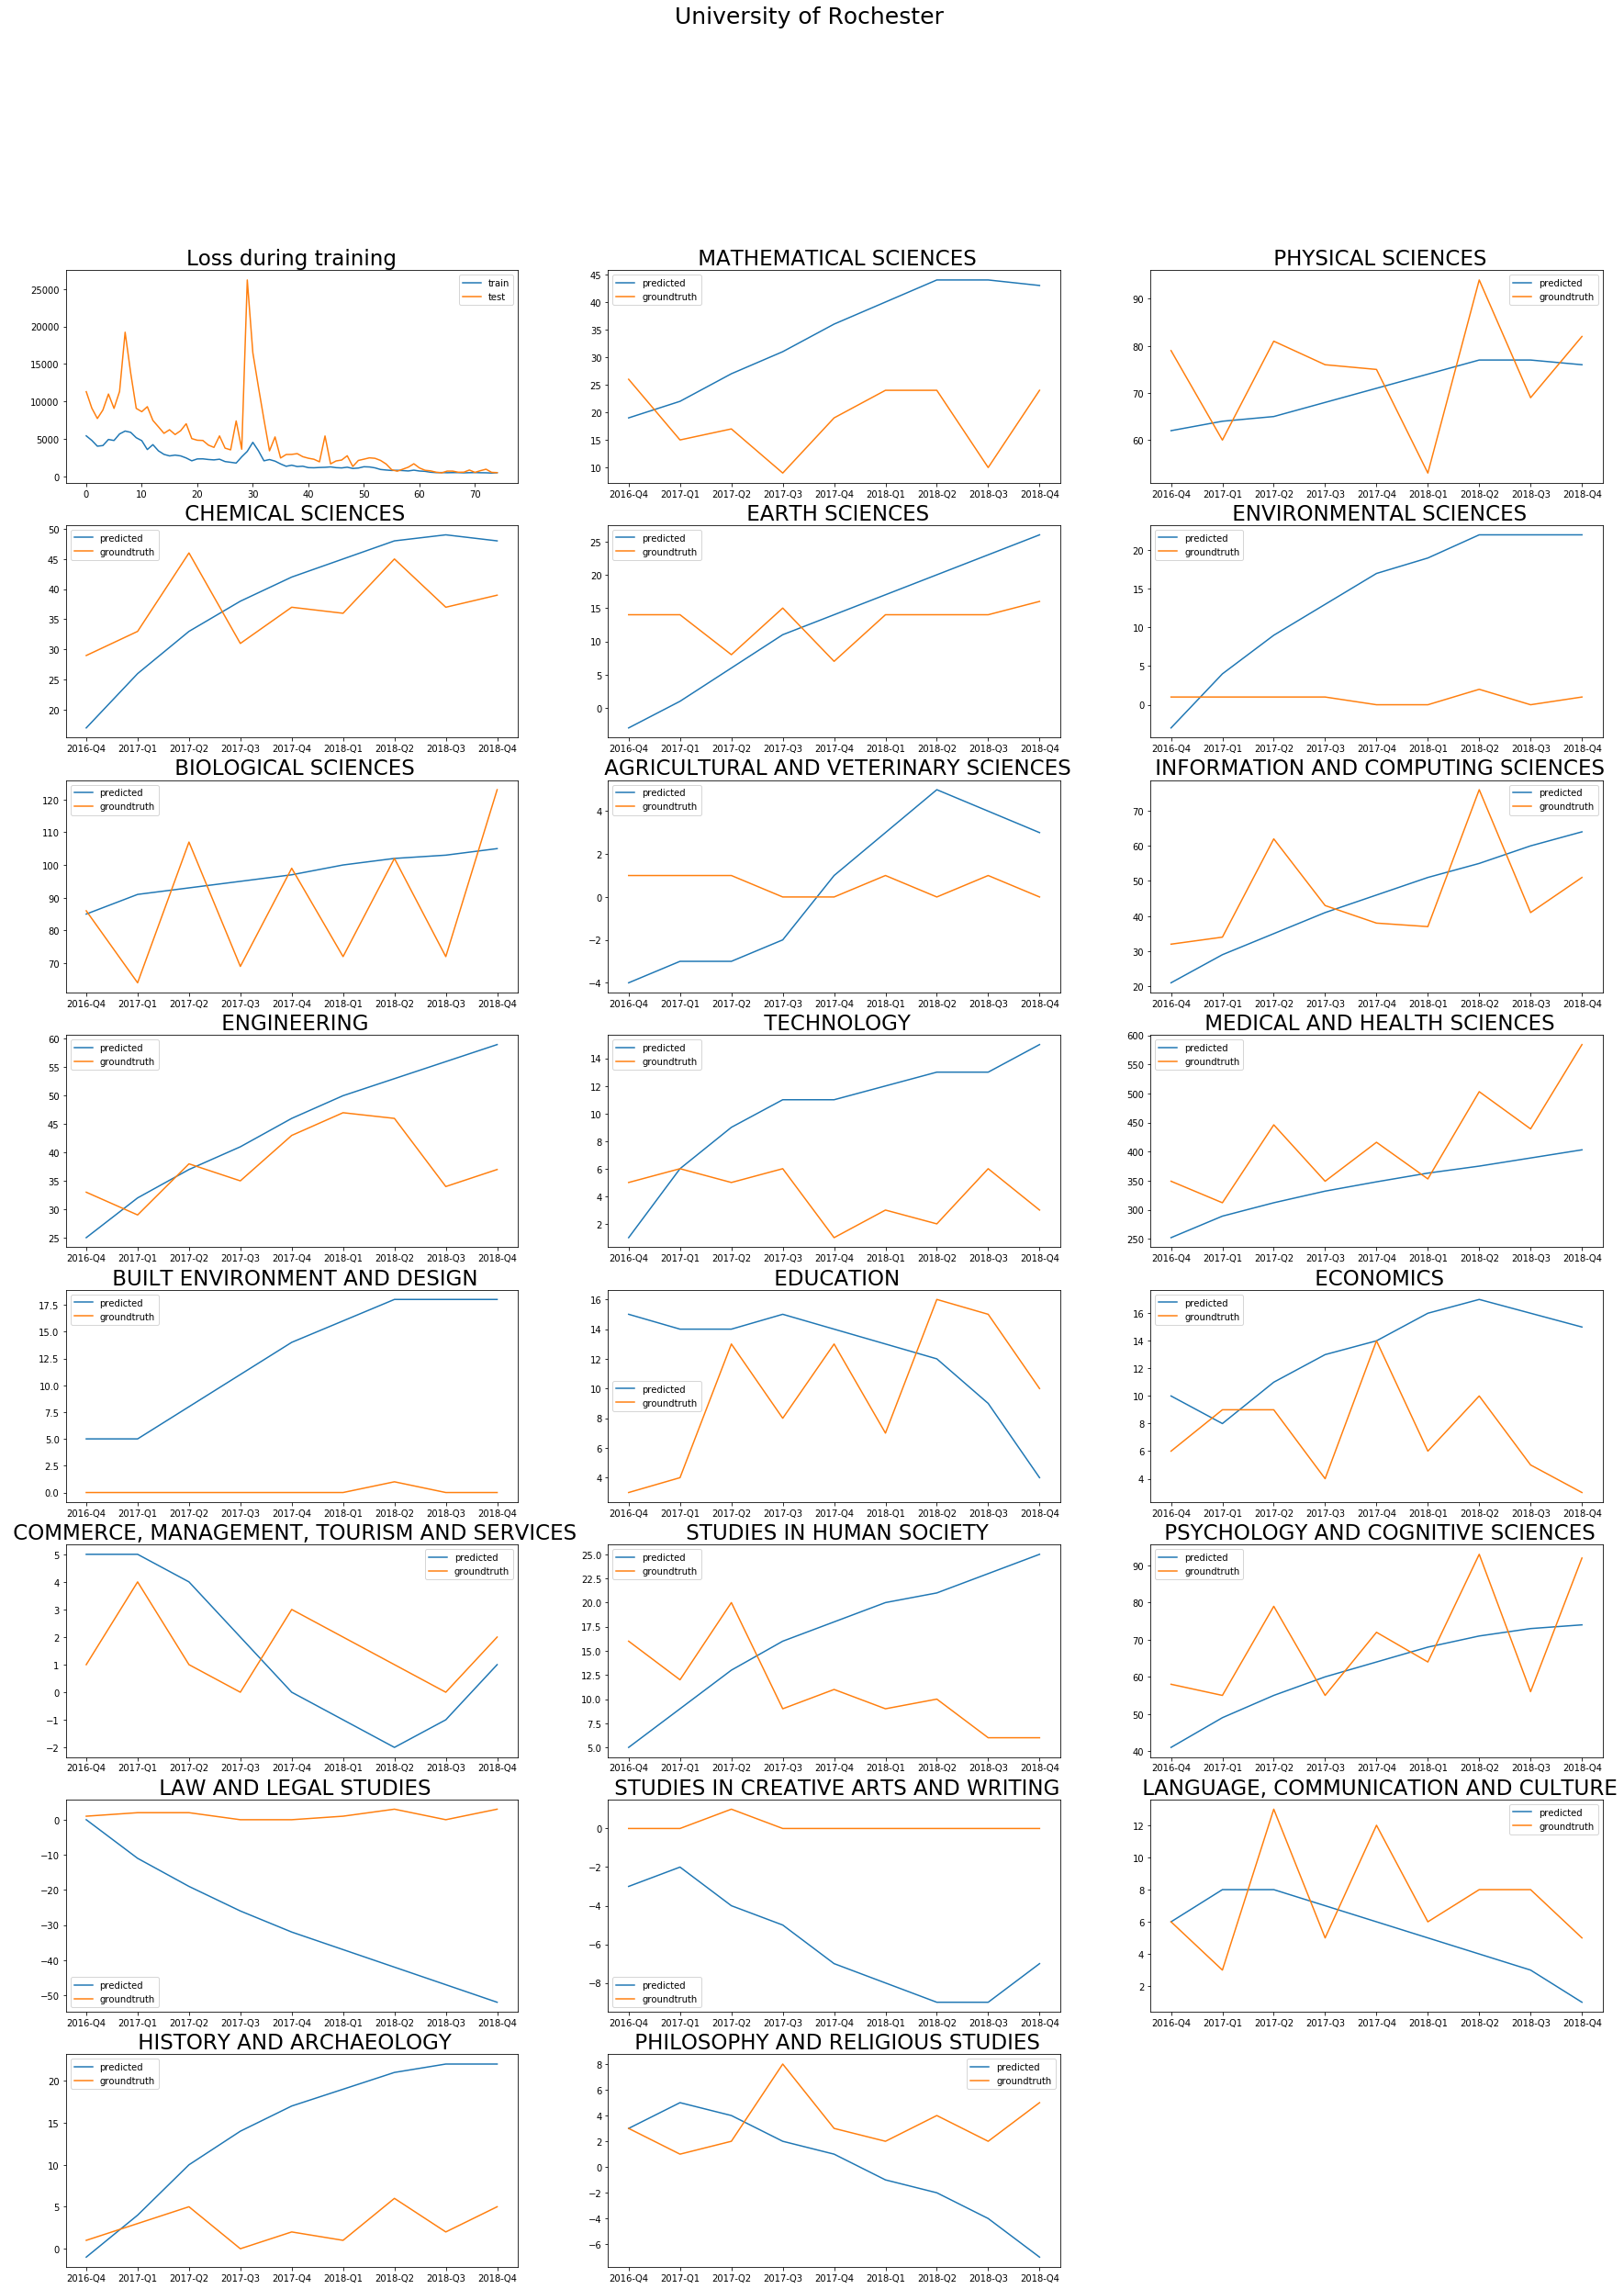

In [77]:
futurepred(school="University of Rochester")

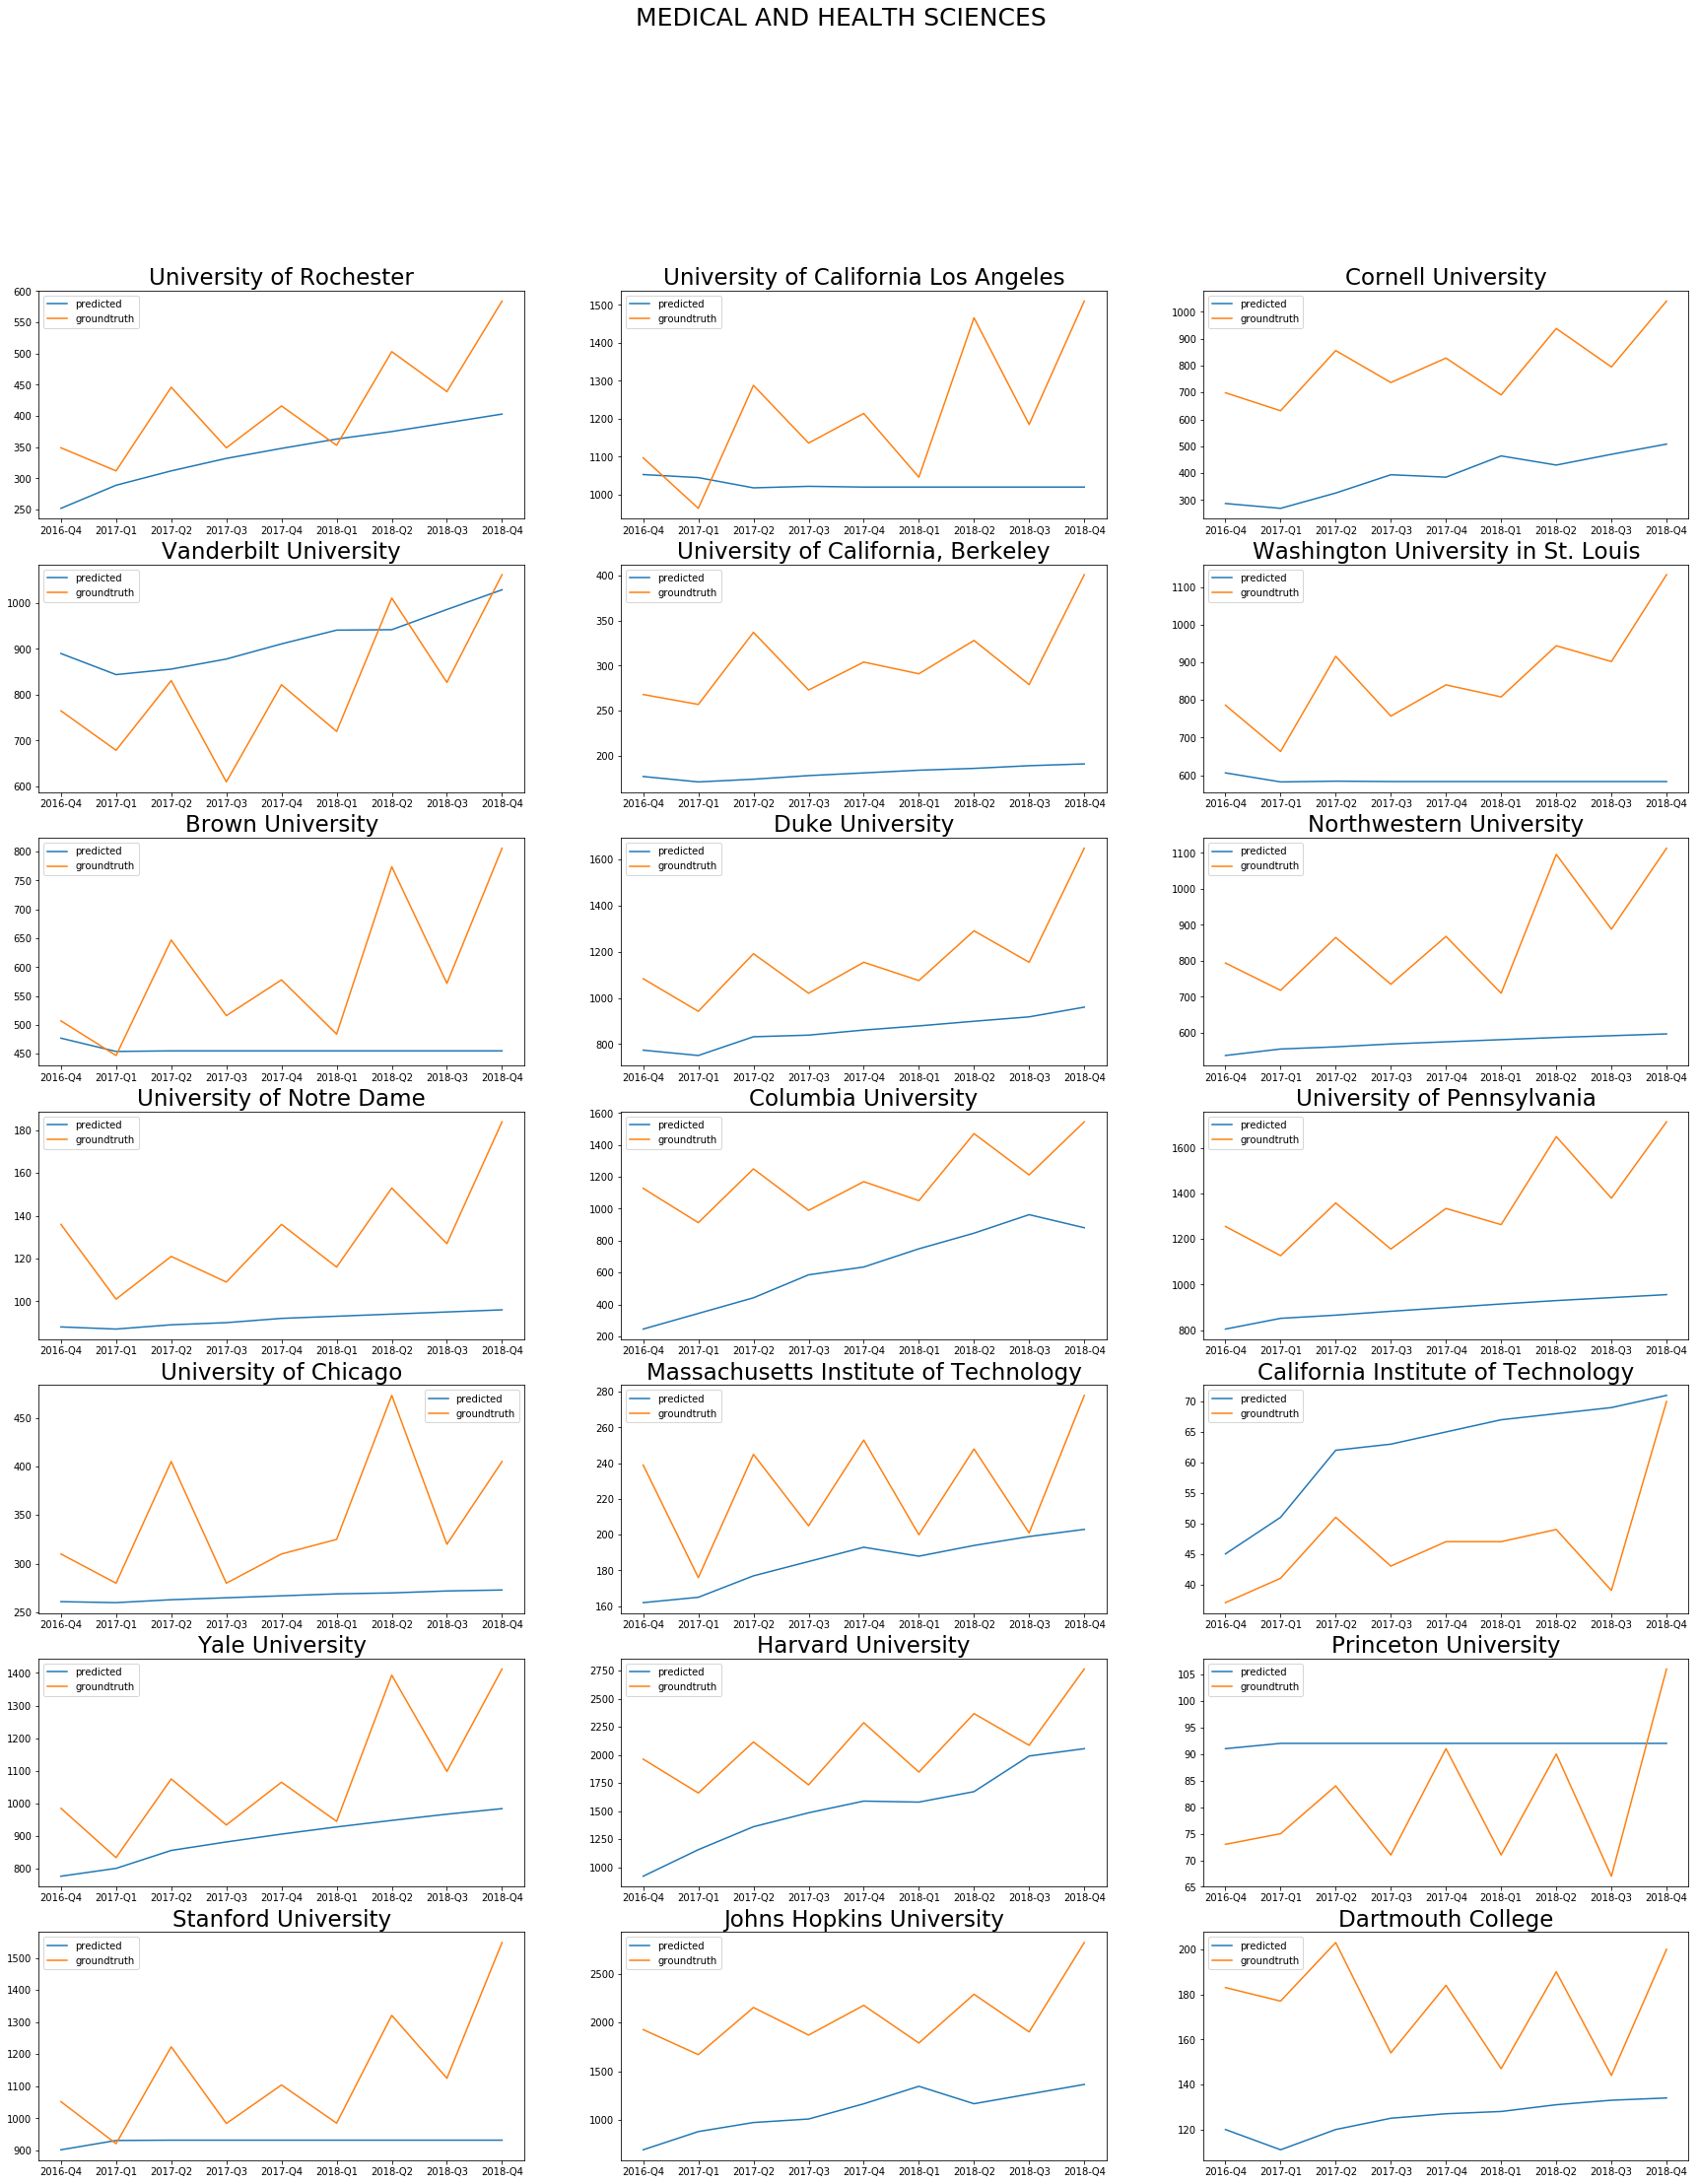

In [78]:
futurepred2(FOR="11")